In [1]:
import george
import emcee
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline

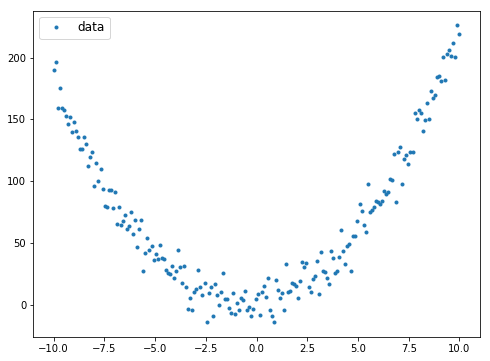

In [19]:
# generate data
plt.figure(figsize=[10,8])
Npts = 200
coeff = [1, 2, 2]
x = np.linspace(-10, 10, Npts)
y = np.polynomial.polynomial.polyval(x, coeff) + np.random.normal(0, 10, size=Npts)
plt.figure(figsize=[8,6])
plt.plot(x, y, '.', label='data');
plt.legend(loc='upper left',fontsize=12)
plt.savefig("images/parametric.png")

In [6]:
# Linear Regression
X = pd.DataFrame(np.dstack((np.ones_like(x), x))[0], columns=["1","x"])
X_x2 = pd.DataFrame(np.dstack((np.ones_like(x), x, x**2))[0], columns=["1","x","x^2"])

regr = linear_model.LinearRegression()
regr.fit(X, y)

regr_x2 = linear_model.LinearRegression()
regr_x2.fit(X_x2, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

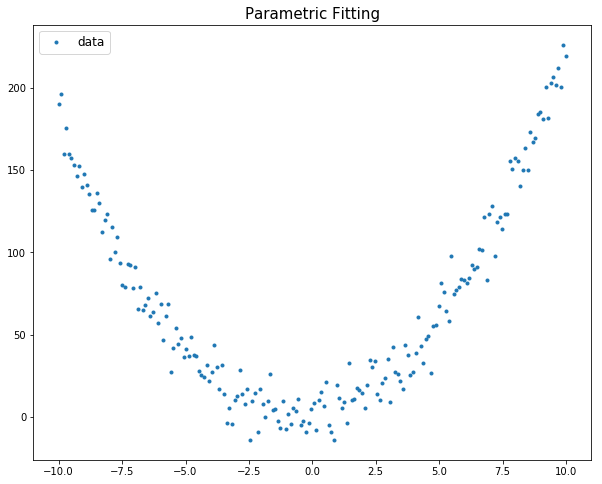

In [20]:
plt.figure(figsize=[10,8])
plt.plot(x, y, '.', label='data');
p = plt.plot(x, regr_x2.predict(X_x2), label='y = a + bx + cx$^2$');
plt.plot(x, regr.predict(X), label='y = a + bx');
plt.title('Parametric Fitting', fontsize=15)
plt.legend(loc='upper left',fontsize=12)
plt.savefig("images/parametric_fit2.png")

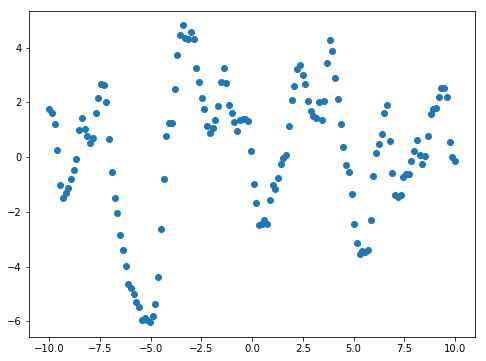

In [14]:
Npts = 150
x = np.linspace(-10, 10, Npts)

# george
kernel = 10 * george.kernels.Matern32Kernel(1)
gp = george.GP(kernel)

np.random.seed(42)
gp.compute(x, np.random.normal(0, 1, Npts))

# plot
plt.figure(figsize=[8,6])
y = gp.sample(x)
plt.plot(x, y, 'o');
plt.savefig("images/nonparametric.png")

In [15]:
# fit using george
kernel = 10 * george.kernels.Matern32Kernel(0.1)
#kernel = 10 * george.kernels.ExpSquaredKernel(1)
gp = george.GP(kernel)

# optimize
gp.compute(x)
gp.optimize(x, y)

# Compute the log likelihood.
print(gp.lnlikelihood(y))

Optimization terminated successfully.
-96.1358416424


In [16]:
# parametric fit
X = pd.DataFrame(np.dstack((np.ones_like(x), x))[0], columns=["1","x"])
X_x2 = pd.DataFrame(np.dstack((np.ones_like(x), x, x**2))[0], columns=["1","x","x^2"])

regr = linear_model.LinearRegression()
regr.fit(X, y)

regr_x2 = linear_model.LinearRegression()
regr_x2.fit(X_x2, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

/Users/silburt/anaconda2/envs/ml/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


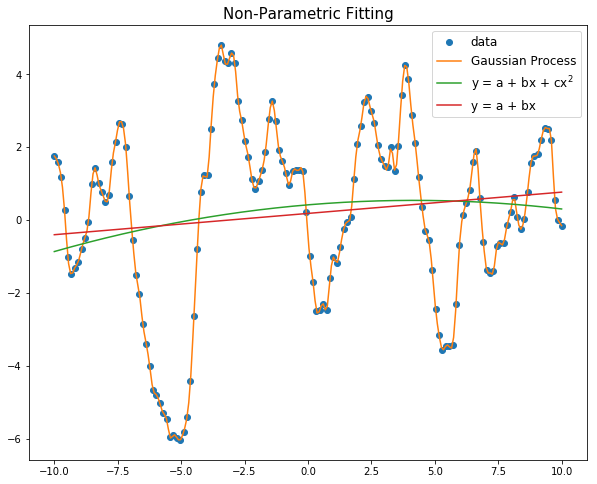

In [17]:
t = np.linspace(-10, 10, 250)
mu, cov = gp.predict(y, t)
std = np.sqrt(np.diag(cov))

plt.figure(figsize=[10,8])
plt.plot(x, y, 'o', label='data');
plt.plot(t, mu, label='Gaussian Process');
plt.plot(x, regr_x2.predict(X_x2), label='y = a + bx + cx$^2$');
plt.plot(x, regr.predict(X), label='y = a + bx');
plt.title('Non-Parametric Fitting', fontsize=15)
plt.legend(fontsize=12)
plt.savefig("images/nonparametric_fit.png")

## Multivariate Gaussian

In [2]:
import corner

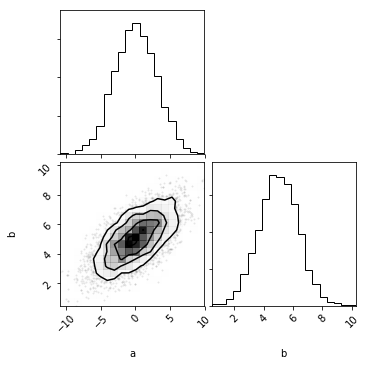

In [7]:
mean = [0, 5]
cov = [[10, 3], [0, 1]]
a = np.random.multivariate_normal(mean, cov, 5000)
fig = corner.corner(a, labels=["a", "b"])
plt.savefig('images/corner2.png')

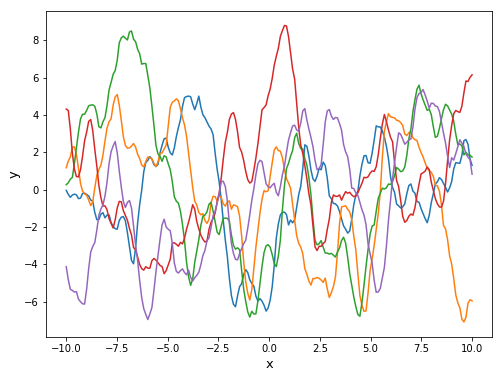

In [90]:
Npts = 200
x = np.linspace(-10, 10, Npts)

# george
l = 1
kernel = 10 * george.kernels.Matern32Kernel(l)
gp = george.GP(kernel)
gp.compute(x, np.random.normal(0, 1, Npts))

# plot
plt.figure(figsize=[8,6])
for i in range(5):
    y = gp.sample(x)
    plt.plot(x, y);
plt.xlabel('x', fontsize=13)
plt.ylabel('y', fontsize=13)
plt.savefig("images/kernels_cov%.2f.png"%l)

(array([  33.,   34.,  108.,  149.,  143.,  138.,  136.,  106.,   92.,   61.]),
 array([-6.20029298, -5.18064984, -4.16100671, -3.14136357, -2.12172043,
        -1.1020773 , -0.08243416,  0.93720897,  1.95685211,  2.97649524,
         3.99613838]),
 <a list of 10 Patch objects>)

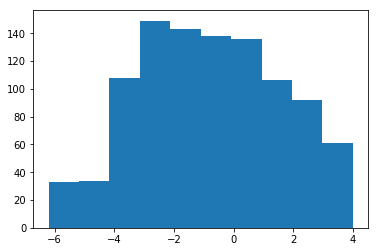

In [97]:
Npts = 1000
x = np.linspace(-10, 10, Npts)
gp.compute(x, np.random.normal(0, 0.1, Npts))
y = gp.sample(x)
plt.hist(y)

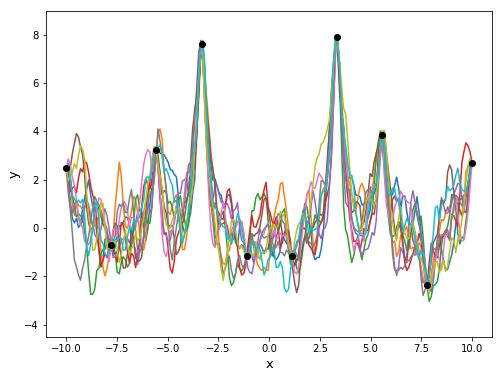

In [68]:
Npts = 200
x = np.linspace(-10, 10, Npts)

# george
l = 0.1
A = 1
kernel = 1 * george.kernels.Matern32Kernel(l)
gp = george.GP(kernel)

Ntest=10
np.random.seed(42)
xtest = np.linspace(-10, 10, Ntest)
ytest = np.random.normal(0, 5, size=Ntest)
gp.compute(xtest)
plt.figure(figsize=[8,6])
for i in range(10):
    plt.plot(x, A*gp.sample_conditional(ytest, x))
plt.plot(xtest, ytest, 'ko')
plt.ylim([-4.5, 9])
plt.xlabel('x', fontsize=13)
plt.ylabel('y', fontsize=13)
plt.savefig("images/Likelihood_highcomplexity.png")